# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Junyoung Seo]

**Dataset:** [Online Shoppers Purchasing Intention]
  
**Date:** [10/06/2025]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on thOnline Shoppers Purchasing Intention se dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Let's import data and necessary libraries such as scipy or numpy for analysis.


In [24]:
# initialization

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [25]:
# importing online shopper intention data set
df = pd.read_csv('online_shoppers_intention.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Numerical : Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType

Categorical : Month, VisitorType, Weekend(Bool), Revenue(Bool)

## 2. Exploratory Data Analysis (EDA)

Let's explore the relationships between variables and revenue. Here's the structure of the dataset:

In [26]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


First, let's examine the distribution of the target variable, Revenue.

=== TARGET VARIABLE ===
Revenue distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


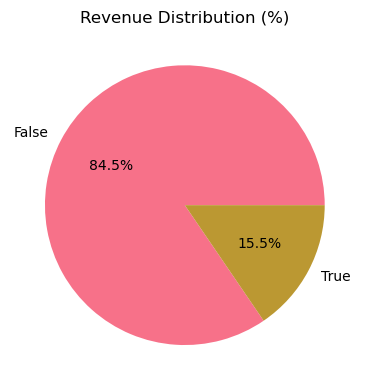

In [36]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
revenue_counts = df['Revenue'].value_counts()
print(f"Revenue distribution:")
print(revenue_counts)

# Visualize Revenue distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.pie(revenue_counts.values, labels=revenue_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()

Of the total sessions in the dataset, only about 15.5% resulted in an actual purchase (Revenue = True), while 84.5% did not. This indicates a significant class imbalance, which is typical for e-commerce conversion data.

Now let's examine the monthly purchase patterns.

       Purchases  Total       Rate
Month                             
Nov          760   2998  25.350233
Oct          115    549  20.947177
Sep           86    448  19.196429
Aug           76    433  17.551963
Jul           66    432  15.277778
Dec          216   1727  12.507238
May          365   3364  10.850178
June          29    288  10.069444
Mar          192   1907  10.068170
Feb            3    184   1.630435


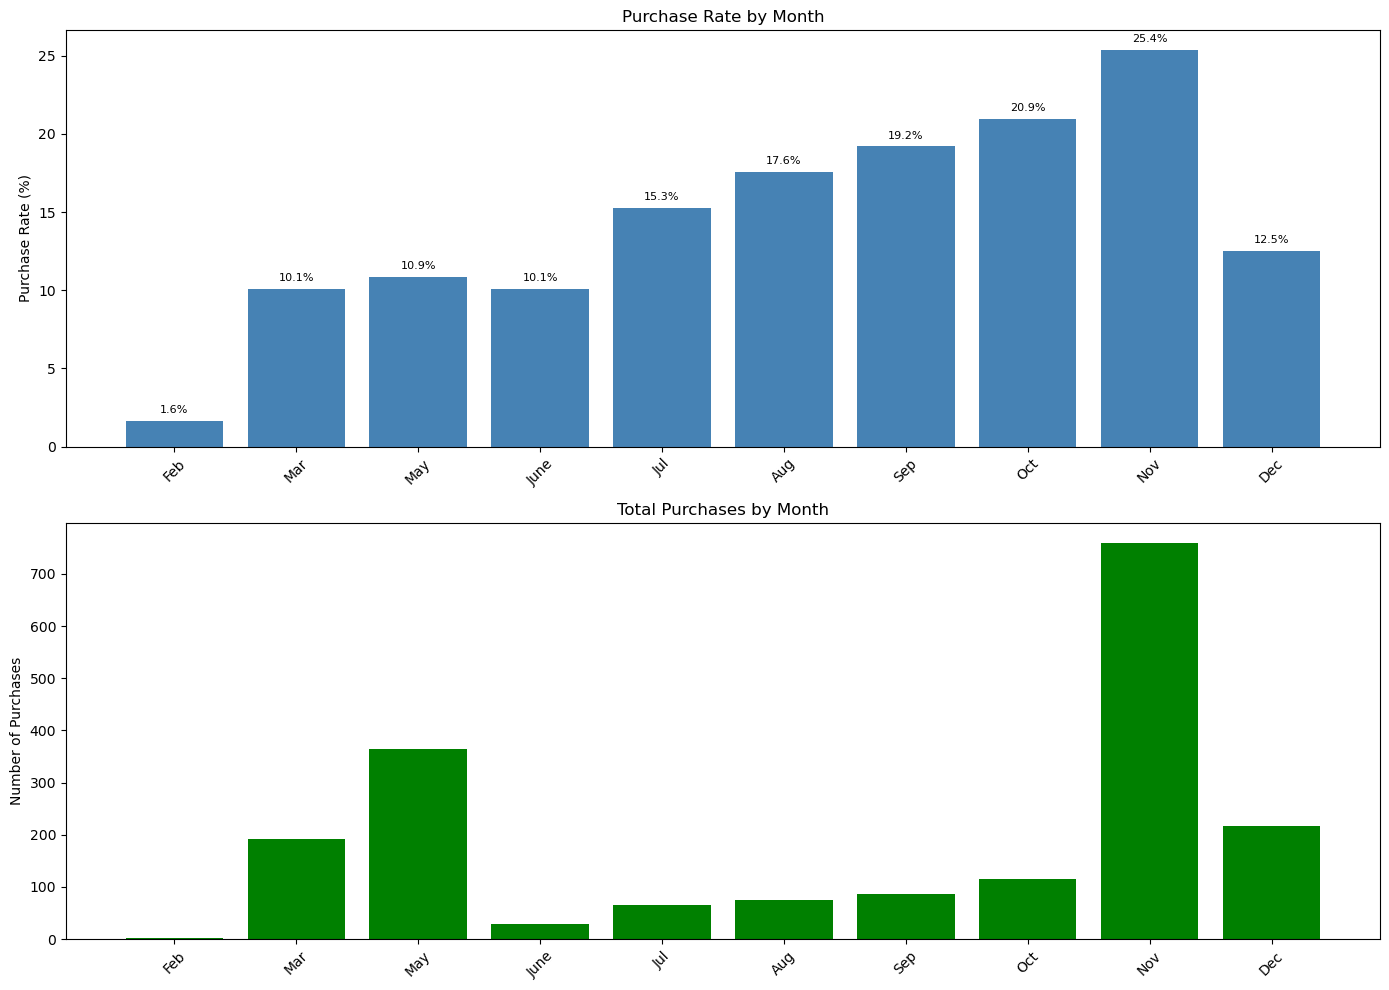

In [15]:
# Monthly Patterns

revenue_counts = df['Revenue'].value_counts()

monthly_stats = df.groupby('Month').agg({
    'Revenue': ['sum', 'count', 'mean']
})
monthly_stats.columns = ['Purchases', 'Total', 'Rate']
monthly_stats['Rate'] = monthly_stats['Rate'] * 100
print(monthly_stats.sort_values('Rate', ascending=False))

# visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# monthly purchase rate
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rates = df.groupby('Month')['Revenue'].mean().reindex(month_order) * 100
axes[0].bar(month_order, rates, color='steelblue')  # axes[0, 0] → axes[0]
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].set_title('Purchase Rate by Month')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(rates):
    axes[0].text(i, v+0.5, f'{v:.1f}%', ha='center', fontsize=8)

# monthly number of purchases
purchase_counts = df[df['Revenue']==True]['Month'].value_counts().reindex(month_order, fill_value=0)
axes[1].bar(month_order, purchase_counts, color='green')  # axes[1, 0] → axes[1]
axes[1].set_ylabel('Number of Purchases')
axes[1].set_title('Total Purchases by Month')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Purchase rate and total purchases are highest in specific months, especially November, likely due to Black Friday and Cyber Monday promotions. In contrast, February shows the lowest purchase rate, indicating a significant seasonal effect where customers are less likely to shop during this period.

Let's examine the correlation heatmap to understand the relationships between variables now.


[Correlation Analysis]


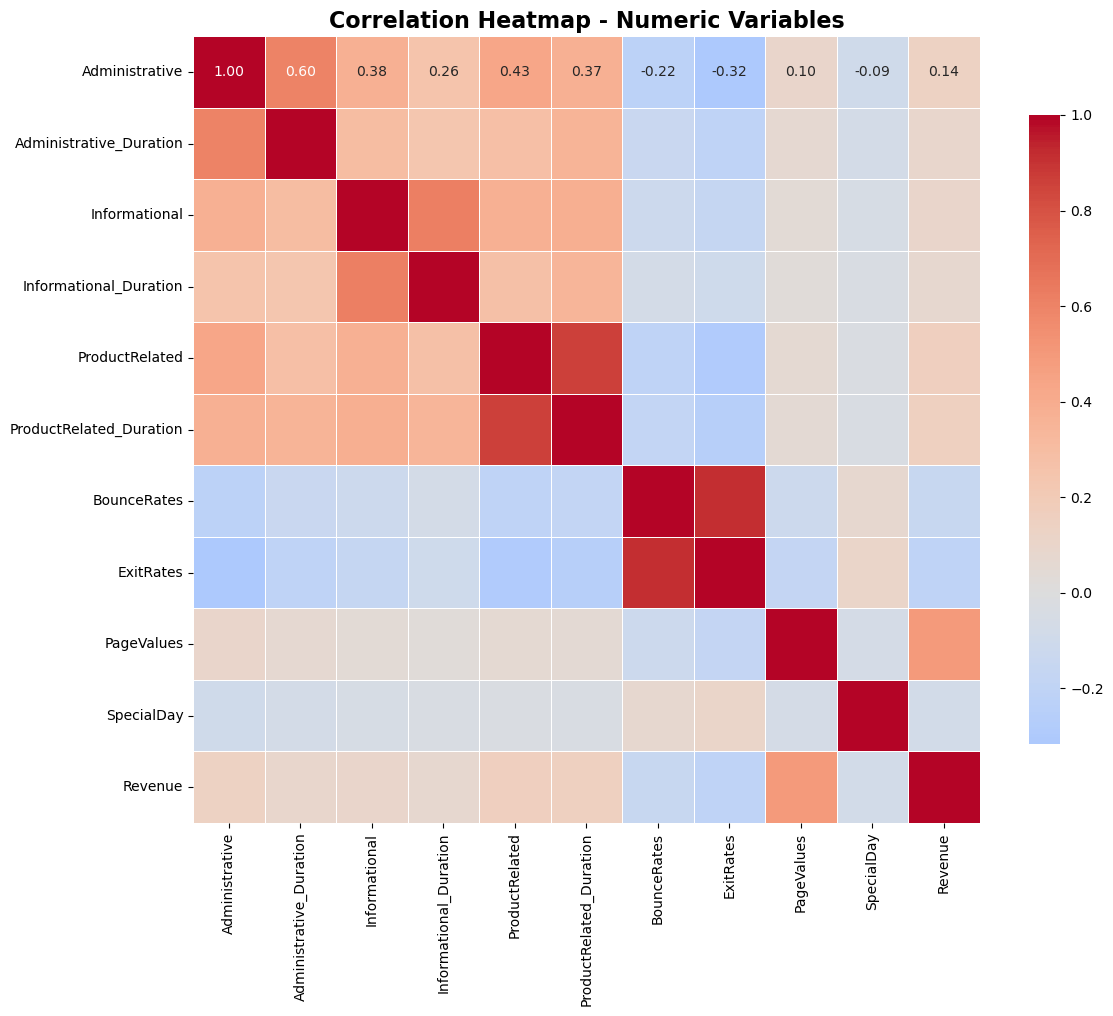


Correlation with Revenue:
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [17]:
# Correlation Heatmap
print("\n[Correlation Analysis]")

numeric_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# quantify the Revenue
df_corr = df[numeric_cols].copy()
df_corr['Revenue'] = df['Revenue'].astype(int)

# correlation matrix
corr_matrix = df_corr.corr()

# visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Revenue:")
revenue_corr = corr_matrix['Revenue'].drop('Revenue').sort_values(ascending=False)
print(revenue_corr)

From the heatmap, focusing on the Revenue row, we can see that PageValues shows the strongest positive correlation with revenue. Considering negative correlations, ExitRates shows a notable negative correlation, suggesting that lower exit rates are associated with higher purchase likelihood.

Now let's dig deeper into the relationship between ExitRates and PageValues with revenue. Let's examine ExitRates first.


[ExitRates Analysis]
           count      mean       std  min       25%       50%       75%  max
Revenue                                                                     
False    10422.0  0.047378  0.051231  0.0  0.015560  0.028571  0.053846  0.2
True      1908.0  0.019555  0.016463  0.0  0.009521  0.016000  0.025000  0.2


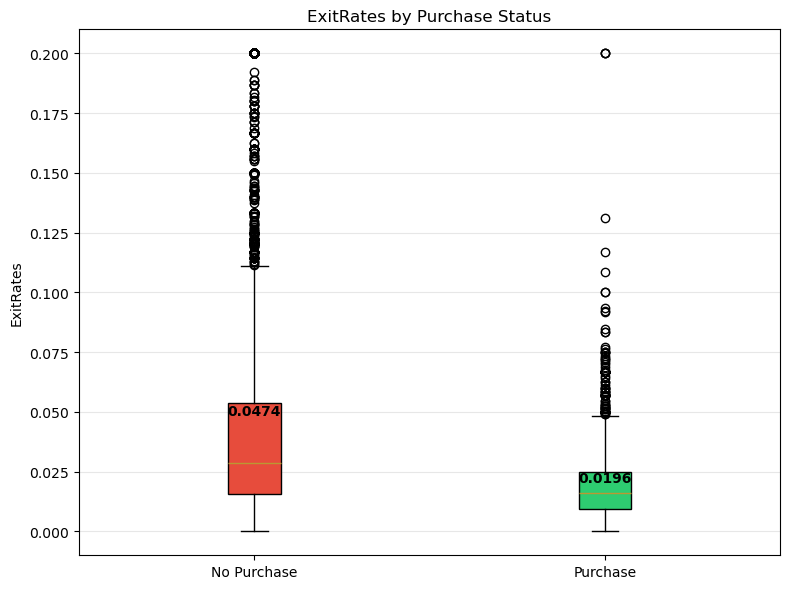

In [27]:
# Exit Rates Analysis
print("\n[ExitRates Analysis]")

exit_by_revenue = df.groupby('Revenue')['ExitRates'].describe()
print(exit_by_revenue)

# visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

exit_no = df[df['Revenue']==False]['ExitRates']
exit_yes = df[df['Revenue']==True]['ExitRates']

# box plot
bp = ax.boxplot([exit_no, exit_yes], labels=['No Purchase', 'Purchase'], patch_artist=True)
bp['boxes'][0].set_facecolor('#e74c3c')
bp['boxes'][1].set_facecolor('#2ecc71')
ax.set_ylabel('ExitRates')
ax.set_title('ExitRates by Purchase Status')
ax.grid(axis='y', alpha=0.3)

# display average value
means = [exit_no.mean(), exit_yes.mean()]
for i, mean in enumerate(means):
    ax.text(i+1, mean, f'{mean:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

Sessions that result in purchases show significantly lower ExitRates (mean: 0.0196) compared to non-purchasing sessions (mean: 0.0474), suggesting that reducing page abandonment is crucial for increasing conversion rates.

Let's examine PageValues now.


[5] PageValues Analysis
           count       mean        std  min       25%        50%        75%  \
Revenue                                                                       
False    10422.0   1.975998   9.072424  0.0  0.000000   0.000000   0.000000   
True      1908.0  27.264518  35.191954  0.0  3.641144  16.758134  38.897742   

                max  
Revenue              
False    246.758590  
True     361.763742  


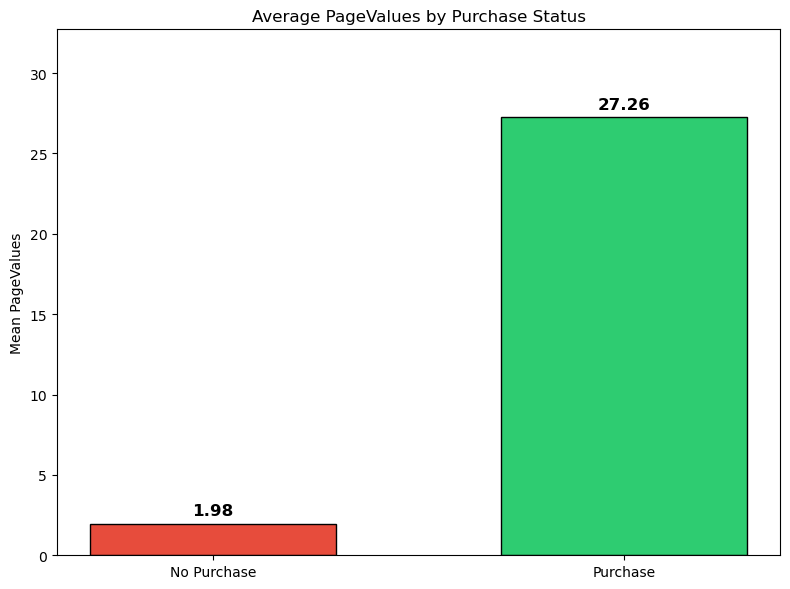

In [28]:
# Page Values Analysis
 
print("\n[5] PageValues Analysis")

pv_by_revenue = df.groupby('Revenue')['PageValues'].describe()
print(pv_by_revenue)

# visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

pv_no = df[df['Revenue']==False]['PageValues']
pv_yes = df[df['Revenue']==True]['PageValues']

means = [pv_no.mean(), pv_yes.mean()]
ax.bar(['No Purchase', 'Purchase'], means, color=['#e74c3c', '#2ecc71'], 
       edgecolor='black', width=0.6)
ax.set_ylabel('Mean PageValues')
ax.set_title('Average PageValues by Purchase Status')
ax.set_ylim(0, max(means) * 1.2)

for i, v in enumerate(means):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

Purchase sessions show significantly higher PageValues compared to non-purchasing sessions, indicating that users who engage with high-value pages are approximately 14 times more likely to convert. This suggests PageValues is a strong predictor of purchase behavior.

## 3. Hypothesis Formulation

### Hypothesis 1: [Monthly Differences in Purchase Rates]
**H1:** [The proportion of sessions resulting in a purchase differs by month.]
- **Null Hypothesis (H0):** [The proportion of Revenue (purchase rate) is the same across all months.]
- **Alternative Hypothesis (H1):** [At least one month has a different purchase rate compared to the others.]
- **Rationale:** [Some specific months show higher purchase rate due to holiday promotion such as Black Friday or Christmas Sales, while other months may show lower baseline activity.The correlation between Month and Revenue showed noticeable differences in proportions, motivating a chi-squared test of independence.]

### Hypothesis 2: [ExitRates and Purchase Behavior]
**H2:** [Sessions that lead to purchases have lower average ExitRates than sessions without purchases.]
- **Null Hypothesis (H0):** [The mean ExitRates are equal for purchasing and non-purchasing sessions.]
- **Alternative Hypothesis (H1):** [The mean ExitRates differ between purchasing and non-purchasing sessions]
- **Rationale:** [ExitRates reflect the likelihood of leaving the website from a particular page. Higher ExitRates generally indicate user drop-off, which should be less common in sessions that result in a purchase. The heatmap revealed a moderate negative correlation between ExitRates and Revenue, suggesting that lower ExitRates may be associated with higher purchase likelihood.]

### Hypothesis 3: [PageValues and Purchase Behavior]
**H3:** [Sessions that lead to purchases have higher average PageValues than sessions without purchases.]
- **Null Hypothesis (H0):** [The mean PageValues are equal for purchasing and non-purchasing sessions.]
- **Alternative Hypothesis (H1):** [The mean PageValues differ between purchasing and non-purchasing sessions.]
- **Rationale:** [PageValues indicate the expected monetary value of pages viewed during a session. Purchasing sessions usually involve more engagement with high-value pages, resulting in much higher PageValues compared to non-purchasing sessions. The heatmap showed a strong positive correlation between PageValues and Revenue]

---


## 4. Hypothesis Testing

### Testing Hypothesis 1: [Monthly Differences in Purchase Rates]

**Test Choice:** [chi-square]
- **Why appropriate:** [Both Month and Revenue are categorical variables. The chi-square test is suitable for checking whether the distribution of purchase rates differs across months by comparing observed and expected frequencies in a contingency table.]


In [31]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Create a contingency table of Month vs Revenue
table = pd.crosstab(df['Month'], df['Revenue'])
print("Contingency Table:\n", table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Perform Chi-squared Test
print("\nChi-squared Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.6f}")

# Interpret results
if p < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")

=== TESTING HYPOTHESIS 1 ===
Contingency Table:
 Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86

Chi-squared Test Results:
Chi2 Statistic = 384.9348
Degrees of Freedom = 9
P-value = 0.000000
→ Reject H0


Since we reject H0 at a = 0.05, this indicates that there is a significant difference in purchase rates across months.

### Testing Hypothesis 2: [ExitRates and Purchase Behavior]

**Test Choice:** [t-test]
- **Why appropriate:** [Revenue is a binary categorical variable and ExitRates is a continuous variable. A t-test is appropriate for comparing the mean ExitRates between the two groups to determine whether there is a statistically significant difference in exit behavior depending on purchase outcome.]


In [32]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")
from scipy import stats


# Split into two groups
group_false = df[df['Revenue'] == False]['ExitRates']
group_true = df[df['Revenue'] == True]['ExitRates']

# t-test
t_stat, p_value = stats.ttest_ind(group_true, group_false, equal_var=False)

# Print results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")

=== TESTING HYPOTHESIS 2 ===
t-statistic: -44.3321
p-value: 0.000000
→ Reject H0


The t-test shows a very large t-statistic and a p-value < 0.001, indicating a highly significant difference in ExitRates between sessions that resulted in a purchase and those that did not.
This may indicate users who made a purchase tend to have significantly lower ExitRates compared to non-purchasing users.

### Testing Hypothesis 3: [PageValues and Purchase Behavior]

**Test Choice:** [t-test]
- **Why appropriate:** [Revenue is a binary categorical variable, and PageValues is a continuous variable. A t-test is appropriate for comparing the mean PageValues between purchasing and non-purchasing groups to determine whether there is a statistically significant difference in page engagement and value associated with purchase behavior.]


In [35]:
# Hypothesis 3 Testing
print("=== TESTING HYPOTHESIS 3 ===")
from scipy import stats


# Split into two groups
group_false = df[df['Revenue'] == False]['PageValues']
group_true = df[df['Revenue'] == True]['PageValues']

# t-test
t_stat, p_value = stats.ttest_ind(group_true, group_false, equal_var=False)

# Print results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")


=== TESTING HYPOTHESIS 3 ===
t-statistic: 31.1992
p-value: 0.000000
→ Reject H0


The t-test result shows a very large positive t-statistic (31.20) and a p-value < 0.001, indicating a highly significant difference in PageValues between purchasing and non-purchasing sessions.

This indicates sessions that resulted in a purchase have significantly higher PageValues compared to sessions without a purchase, suggesting stronger engagement and higher page value accumulation among purchasing users.

## 5. Summary and Conclusions

### Key Findings from EDA:
1. [Main Observation]
- Only 15.5% of sessions resulted in a purchase, showing a clear imbalance between purchasing and non-purchasing sessions.
- Most numerical features are right-skewed, indicating that most users have low engagement, while a small number show extremely high activity.
- The majority of sessions come from returning visitors (85.6%), with session activity peaking in May and November.
2. [Patterns]
- Purchase rates vary significantly by month, with November showing the highest (25.4%) and February the lowest (1.6%).
- New visitors display a higher purchase rate than returning visitors, which is an interesting deviation from typical trends.
- Purchasing sessions have lower ExitRates, higher PageValues, and longer product-related activity.
  
3. [Interesting Relationships]
- PageValues has the strongest positive correlation with Revenue (0.49).
- ExitRates is moderately negatively correlated with Revenue (−0.21).
- Seasonal factors and engagement behavior together strongly influence purchase likelihood.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Chi-Square] | [0.0000] | [Significant] | [Purchase rates vary significantly across months, indicating strong seasonal effects.] |
| **H2** | [T-Test] | [0.0000] | [Significant] | [ExitRates differ significantly between purchasing and non-purchasing sessions, with buyers showing lower ExitRates.] |
| **H3** | [T-Test] | [0.0000] | [Significant] | [PageValues are significantly higher for purchasing sessions, reflecting stronger engagement with high-value pages.] |

### Key Insights:
- [Result]
  * Purchase behavior is influenced by both seasonal trends and user engagement patterns.
  * November shows the highest purchase rate, reflecting strong seasonal effects.
  * PageValues, ExitRates, and product-related activity clearly distinguish purchasing sessions from non-purchasing ones.
  * Purchasing users tend to have higher engagement and lower abandonment rates.
- [Practical Implications]
  * Focus marketing and promotional efforts during specific months such as November.
  * Improve product page design and engagement to encourage user interaction and conversions.
  * Monitor and reduce ExitRates to minimize session drop-offs. (Maybe some extra promotions on non-holiday)
  * Use PageValues as an early behavioral indicator for targeted marketing or personalized offers.
- [Limitations]
  * The dataset is imbalanced (only 15.5% purchases), which can influence test results and model performance.
  * External factors such as pricing, promotions, or ad campaigns are not included in the dataset.
  * The findings are correlational, not causal, so direct cause-effect relationships cannot be confirmed.

### Future Research:
- Use predictive modeling (linear regression, random forest, etc.) to estimate purchase likelihood based on behavioral variables.
  * Since EDA is already done, finding the best fit model might be the next step.
- Apply some time-series or trend analysis to understand long-term seasonal effects on purchasing behavior.

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [33]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Online Shoppers Purchasing Intention]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [Online Shoppers Purchasing Intention]
Sample size: 12330 observations
Number of features: 17 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
